## Airline Tweets - Text Analysis

### By Gautam Borgohain

In this part, we would analyze the datset for textual features and the try to predict the sentiment

In [3]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

pd.options.display.max_rows = 10
pd.options.display.notebook_repr_html = True
pd.options.display.max_columns = None
df = pd.read_csv('/Users/gautamborgohain/Downloads/airline-twitter-sentiment/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


First to clean up the tweets, here is a function that does some modifications.

1. Remove the @Airlines part  -- later we will replace with Target and then not replace at all to see if that affects the prediction 
2. Remove all url  -- later we will replace with '_URL_' to check if this has any predictive power
3. Remove newlines in the tweets
4. Make some emoticons dictionary friendly - later on we will use the MPQA Subjectivity lexicon and this might be helpful.

In [4]:
import re
def regexStuff(tweet):
#     tweet = re.sub(r'@[^ ]*','_TARGET_',tweet)
#     tweet = re.sub('((www\.[^ ]+)|(https?://[^ ]+))', '_URL_', tweet)
    tweet = re.sub(r'@[^ ]*','',tweet)
    tweet = re.sub('((www\.[^ ]+)|(https?://[^ ]+))', '', tweet)
    tweet = re.sub(r'[\n]','',tweet)
    tweet = re.sub(r':-D|:D',' HAPPY',tweet)
    tweet = re.sub(r':-\)|:\)',' HAPPY',tweet)
    tweet = re.sub(r':-\(|:\(',' SAD',tweet)
    tweet = re.sub(r';-\)|;\)',' WINK',tweet)
    tweet = re.sub(r'#','HASH_',tweet)
    return tweet



Apply the function to the tweets and print a sample of the result

In [5]:
cleanedtweets = [regexStuff(tweet) for tweet in df['text']]
cleanedtweets[:20]

[' What  said.',
 " plus you've added commercials to the experience... tacky.",
 " I didn't today... Must mean I need to take another trip!",
 ' it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 " and it's a really big bad thing about it",
 " seriously would pay $30 a flight for seats that didn't have this playing.it's really the only bad thing about flying VA",
 ' yes, nearly every time I fly VX this “ear worm” won’t go away  HAPPY',
 ' Really missed a prime opportunity for Men Without Hats parody, there. ',
 " Well, I didn't…but NOW I DO!  HAPPY",
 " it was amazing, and arrived an hour early. You're too good to me.",
 ' did you know that suicide is the second leading cause of death among teens 10-24',
 ' I &lt;3 pretty graphics. so much better than minimal iconography.  HAPPY',
 " This is such a great deal! Already thinking about my 2nd trip to  &amp; I haven't even gone on my 1st trip yet! ;p",
 "  I'm flying your HA

Seperate out the different sentiments to see what word distribution in each of the sentiment classification

Axes(0.125,0.125;0.775x0.775)


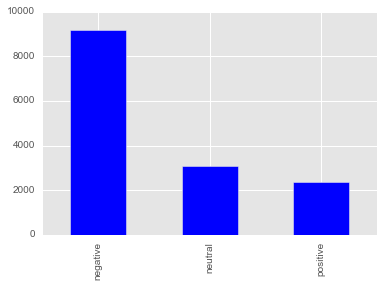

In [6]:
df_copy = df.copy()
df_copy['text'] = cleanedtweets
print(df_copy.airline_sentiment.value_counts().plot(kind = 'bar'))
df_positive = df_copy.query('airline_sentiment == "positive"')[['text']]
df_negative = df_copy.query('airline_sentiment == "negative"')[['text']]
df_neutral = df_copy.query('airline_sentiment == "neutral"')[['text']]

Import SciKit learn's Count Vectorizer to easily create the document matrix which we would need for applying to classifiers

The function takes various arguments that allow us to customize the matrix formation.
min,max_df - specify the minimum or maximum document frequency
stop_words -to remove the stopwords in the data
lowercase - to turn the words in lowercase before vectorizing
ngram_range - specify the range of ngrams to be created in the corpus

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1,max_df=1.0,stop_words='english',lowercase=True,ngram_range=(1,1))

After initializing the vectorizer,create the term document matrix using the fit_transform method.
In order to make it easier for us to plot, we will make a dataframe out of this, take the sum of the columns and plot

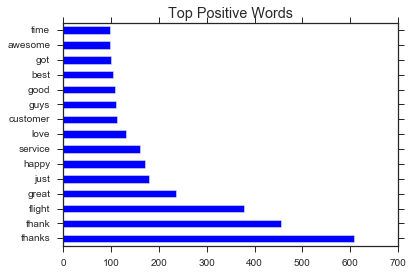

In [37]:
documentmatrix = vectorizer.fit_transform(df_positive['text']).toarray()
columns = vectorizer.get_feature_names()
positive_vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
positive_words = positive_vectordf.sum(axis = 0)
positive_words.sort_values(ascending=False)[:15].plot(kind = 'barh',title = 'Top Positive Words')

Similarly the negative words

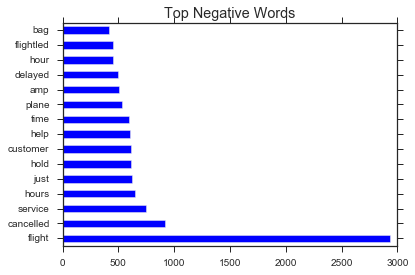

In [38]:
documentmatrix = vectorizer.fit_transform(df_negative['text']).toarray()
columns = vectorizer.get_feature_names()
negative_vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
negative_words = negative_vectordf.sum(axis = 0)
negative_words.sort_values(ascending=False)[:15].plot(kind = 'barh',title = 'Top Negative Words')

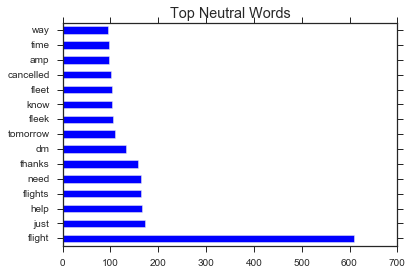

In [39]:
documentmatrix = vectorizer.fit_transform(df_neutral['text']).toarray()
columns = vectorizer.get_feature_names()
neutral_vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
neutral_words = neutral_vectordf.sum(axis = 0)
neutral_words.sort_values(ascending=False)[:15].plot(kind = 'barh',title = 'Top Neutral Words')

Now use the CountVectorizer to generate negrams - bi and trigrams so that we can see which word pairs are most common in various sentiments

In [46]:
vectorizer = CountVectorizer(min_df=1,max_df=1.0,stop_words='english',lowercase=True,ngram_range=(2,3))

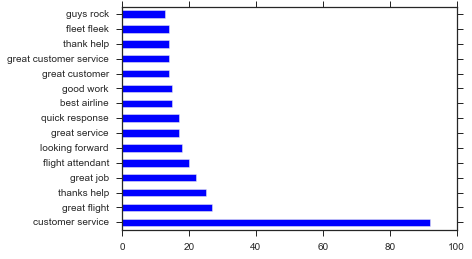

In [72]:
import seaborn as sns

documentmatrix = vectorizer.fit_transform(df_positive['text']).toarray()
positive_columns = vectorizer.get_feature_names()
positive_vectordf = pd.DataFrame(data=documentmatrix, columns=positive_columns)
positive_words = positive_vectordf.sum(axis = 0)

positive_topwords = positive_words.sort_values(ascending=False)[:15]# take the top 15 words
positive_topwords.plot(kind = "barh")

# positive_topwordsdf = positive_vectordf[positive_topwords.index]#select the term document frequecies of those words
# positive_topwordscor = positive_topwordsdf.corr()#generate correlation among each other

# #This is to set the size of the plot

# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)#A4 size

# sns.heatmap(positive_topwordscor,ax = ax)

Nothing interesting in the positive tweets here. These correlation plot basically tells us how strong the relationship between the two or three terms is. So 

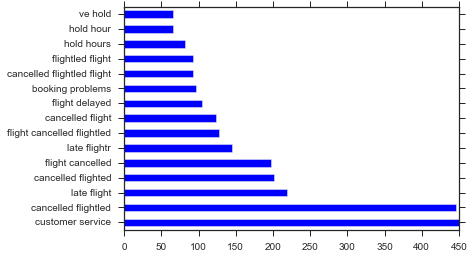

In [73]:
documentmatrix = vectorizer.fit_transform(df_negative['text']).toarray()
negative_columns = vectorizer.get_feature_names()
negative_vectordf = pd.DataFrame(data=documentmatrix, columns=negative_columns)
negative_words = negative_vectordf.sum(axis = 0)

negative_topwords = negative_words.sort_values(ascending=False)[:15]# take the top 15 words
negative_topwords.plot(kind = "barh")

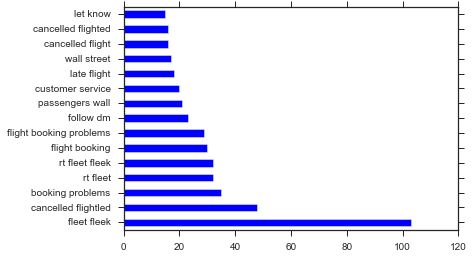

In [74]:
documentmatrix = vectorizer.fit_transform(df_neutral['text']).toarray()
columns = vectorizer.get_feature_names()
neutral_vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
neutral_words = neutral_vectordf.sum(axis = 0)

neutral_topwords = neutral_words.sort_values(ascending=False)[:15]# take the top 15 words
neutral_topwords.plot(kind = 'barh')

In [78]:
vectorizer = CountVectorizer(min_df=1,max_df=1.0,stop_words='english',lowercase=True,ngram_range=(1,1))

documentmatrix = vectorizer.fit_transform(df['text']).toarray()
columns = vectorizer.get_feature_names()
vectordf = pd.DataFrame(data=documentmatrix, columns=columns)

combineddf = pd.concat([df,vectordf], axis = 1)
combineddf.shape

(14640, 14786)

In [77]:

from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', c = 1.0,gamma = 'auto')

clf.fit()
